In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, dataloader
from torchsummary import summary

import sys
sys.path.append('../src')
from model import *
from datagen import *

## Dataset

In [2]:
# Dataclass for adding problem

class Datamodel(Dataset):
    def __init__(self,time_pos_points,labels):
        self.x = time_pos_points
        self.y = labels
    def __len__(self): 
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

In [3]:
n_data = 2000
t_steps = 20

# data,labels = datagen_full_sum_normal(n_data,t_steps,normalize=True)
data,labels = datagen_circular(n_data,t_steps)
# data,labels = datagen_timewise_labels(n_data,t_steps,2)
# print(data[1],labels[1])

BATCH_SIZE = 64

training_data = Datamodel(data,labels)
training_loader = torch.utils.data.DataLoader(training_data, batch_size=BATCH_SIZE, shuffle=True)

data.shape

print(labels[99])
print(data[99])

tensor([0.0169, 0.3298, 0.8079, 1.0712, 1.3728, 1.4597, 1.8771, 2.1128, 2.2635,
        2.4529, 3.2180, 3.4319, 3.5378, 4.1351, 4.5798, 5.1252, 5.2179, 5.8031,
        5.9365, 6.2832])
tensor([[0.0027],
        [0.0498],
        [0.0761],
        [0.0419],
        [0.0480],
        [0.0138],
        [0.0664],
        [0.0375],
        [0.0240],
        [0.0301],
        [0.1218],
        [0.0340],
        [0.0169],
        [0.0951],
        [0.0708],
        [0.0868],
        [0.0148],
        [0.0931],
        [0.0212],
        [0.0552]])


## Model training

100%|██████████| 1400/1400 [01:01<00:00, 22.79it/s]


Losses array was not a multiple of average. Truncated to 1380


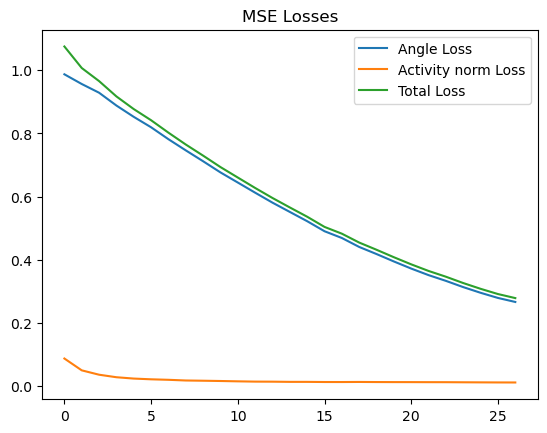

Guess on the first 15 training data:  tensor([[0.5437, 0.7801, 1.0247, 1.2347, 1.4972, 1.7389, 2.0677, 2.1214, 2.0793,
         2.0541, 1.9729, 1.9687, 1.9239, 1.8462, 1.4365, 1.2018, 1.0376, 0.9290,
         0.8186, 0.7266],
        [0.5507, 0.7892, 1.0097, 1.2327, 1.4753, 1.7230, 2.0422, 2.0878, 2.0306,
         2.0072, 1.9602, 1.9697, 1.9404, 1.9101, 1.4249, 1.2070, 1.0286, 0.9286,
         0.8146, 0.7477],
        [0.5456, 0.7819, 1.0201, 1.2236, 1.5011, 1.6989, 2.0503, 2.0818, 2.0319,
         2.0203, 1.9786, 1.9620, 1.9537, 1.8679, 1.4467, 1.1735, 1.0636, 0.9200,
         0.8430, 0.7180],
        [0.5529, 0.7928, 1.0085, 1.2367, 1.4722, 1.7090, 2.0008, 2.0515, 1.9702,
         1.9895, 1.9450, 1.9232, 1.9133, 1.8402, 1.4327, 1.2014, 1.0418, 0.9282,
         0.8253, 0.7168],
        [0.5604, 0.8091, 1.0283, 1.2250, 1.4645, 1.6824, 2.0160, 2.0540, 2.0022,
         2.0109, 1.9811, 1.9579, 1.9320, 1.8937, 1.4300, 1.2025, 1.0340, 0.9269,
         0.8088, 0.7141],
        [0.5469, 0.781

In [41]:
hidden_size = 2
input_size = 1
output_size = 1

train1 = True

if train1:
    # model2 = torch_RNN1(input_size,t_steps,output_size,hidden_size,lr=0.01,irnn=True,outputnn=False,Wx_normalize=True)
    # model1 = torch_RNN_full_manual(input_size,t_steps,output_size,hidden_size,lr=0.001,irnn=False,outputnn=True,Wx_normalize=False,activation=False)
    # model1 = RNN_L2(input_size,t_steps,output_size,hidden_size,lr=0.001,w_decay=0.000,act_decay=1000,irnn=False,outputnn=True,Wx_normalize=False,activation=False)
    model1 = RNN_circular_ND(input_size,t_steps,output_size,hidden_size,lr=0.001,w_decay=0.000,act_decay=0.01,irnn=False,outputnn=False,Wx_normalize=False,activation=False,rotation_init=False,bias=False)
    # print("Guess on the first 15 training data: ", model1(data[0:15]))
    _ = model1.train(epochs=1400)
    model1.plot_losses(average=30)
    # model1.plot_accs()
    print("Guess on the first 15 training data: ", model1(data[0:15]))
    # print("Weight of the hidden layer: ",model2.rnn.weight_hh_l0, " Weight of the input layer: ",model2.rnn.weight_ih_l0)

In [34]:
_ = model1.train(epochs=1)

100%|██████████| 1/1 [00:00<00:00, 26.77it/s]


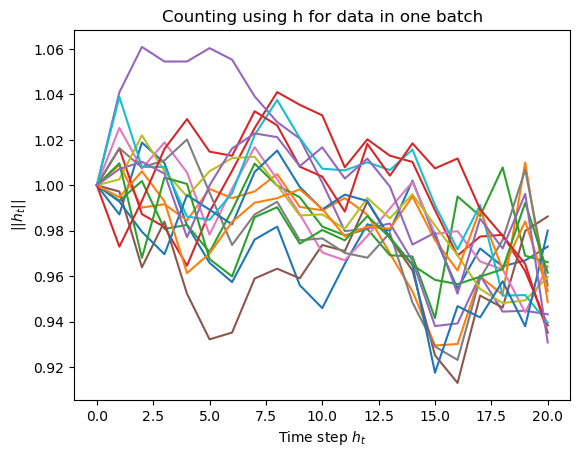

In [42]:
model1.hts.norm(dim=2).shape
htss = model1.hts.norm(dim=2)
plt.plot(htss.detach().numpy())
plt.title("Counting using h for data in one batch")
plt.xlabel(r"Time step $h_t$")
plt.ylabel(r"$||h_t||$")
plt.show()

torch.Size([21, 15, 2])


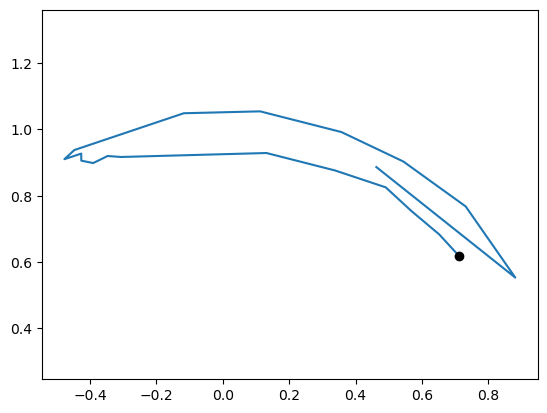

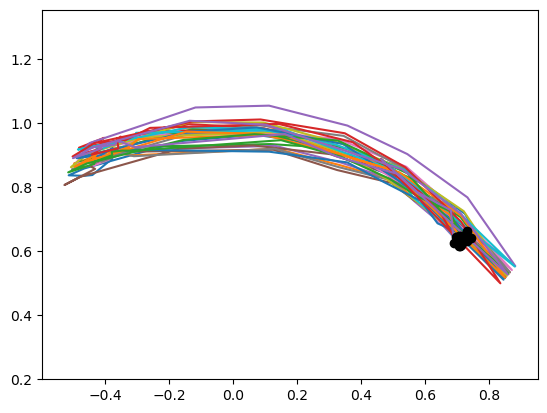

In [43]:
n = 4
print(model1.hts.shape)
model1.hts[:,n,:].shape
hts_cric = model1.hts.detach().numpy()
plt.plot(hts_cric[:,n,0],hts_cric[:,n,1],"-")
plt.plot(hts_cric[-1,n,0],hts_cric[-1,n,1],"o",color="black")
plt.axis("equal")
plt.show()
plt.plot(hts_cric[:,:,0],hts_cric[:,:,1],"-")
plt.plot(hts_cric[-1,:,0],hts_cric[-1,:,1],"o",color="black")
plt.axis("equal")
plt.show()

In [22]:
print(model1(data[10:11]))
print(data[10:11])
print(labels[10:11])

tensor([[0.3198, 0.6345, 0.9659, 1.2615, 1.5944, 1.9125, 2.1544, 2.3663, 2.5516,
         2.6225, 2.5347, 2.3623, 2.1522, 1.9027, 1.6440, 1.3138, 1.0335, 0.7630,
         0.5047, 0.2198]], grad_fn=<PermuteBackward0>)
tensor([[[0.0414],
         [0.0433],
         [0.0353],
         [0.0902],
         [0.0499],
         [0.0348],
         [0.0658],
         [0.0583],
         [0.0283],
         [0.0473],
         [0.0691],
         [0.0317],
         [0.0226],
         [0.0361],
         [0.0138],
         [0.0784],
         [0.0439],
         [0.0597],
         [0.0429],
         [0.1073]]])
tensor([[0.2604, 0.5323, 0.7538, 1.3203, 1.6336, 1.8520, 2.2655, 2.6315, 2.8096,
         3.1067, 3.5409, 3.7404, 3.8822, 4.1087, 4.1952, 4.6878, 4.9636, 5.3390,
         5.6088, 6.2832]])


In [23]:
((torch.abs(torch.sin(torch.tensor(2*np.pi))-torch.sin(torch.tensor(0))) + torch.abs(torch.cos(torch.tensor(2*np.pi))-torch.cos(torch.tensor(0))))**2).mean()

tensor(3.0571e-14)

[0.16569878 0.564851   0.76648223 1.4883035  2.2166507  2.8360522
 3.2424161  3.5274055  3.7405689  3.8320875  4.124668   4.3178763
 4.783222   5.1264496  5.1807523  5.3780637  5.8866034  6.0228233
 6.0387707  6.283187  ]


(-1.0946677058935166,
 1.0997460812330246,
 -1.0971969604492187,
 1.0963039636611938)

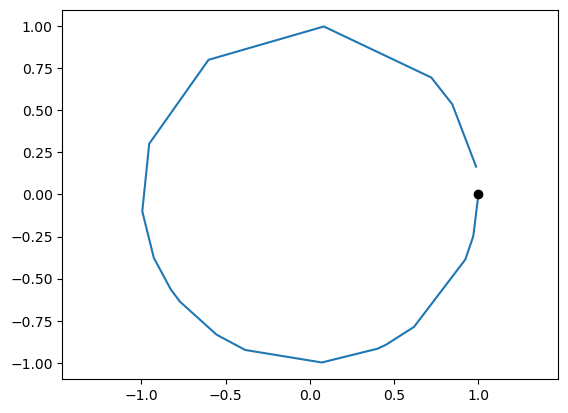

In [24]:
# Plot circle from data
data_raw = labels[91].detach().numpy()
print(data_raw)
data_points = np.zeros((t_steps,2))
for i in range(t_steps):
    data_points[i,0] = np.cos(data_raw[i])
    data_points[i,1] = np.sin(data_raw[i])


plt.plot(data_points[:,0],data_points[:,1],"-")
plt.plot(data_points[-1,0],data_points[-1,1],"o",color="black")
plt.axis("equal")

In [39]:
print(model1.input.weight)
print(model1.hidden.weight)
print(model1.Wh_init)
# print(model1.output.weight)

Parameter containing:
tensor([[0.8772],
        [0.1162]], requires_grad=True)
Parameter containing:
tensor([[ 0.9037, -0.0764],
        [ 0.0017,  0.9515]], requires_grad=True)
tensor([[1., 0.],
        [0., 1.]])


In [26]:
# hc = 0
# for h in model2.hts[0][0]:
#     hc += h

# np.linalg.norm(model2.hts[0,0].detach().numpy())
an1 = model1.hts[:,0,:]
an1 = an1.detach().numpy()
print(an1.shape)

for i in range(1,len(an1)):
    an1_i_normalized = an1[i]/np.linalg.norm(an1[i])
    an1_i_minus_1_normalized = an1[i-1]/np.linalg.norm(an1[i-1])
    # print(an1_i_normalized @ an1_i_minus_1_normalized)
    # Angle between an1[i] and an1[i-1]
    ang = np.arccos(an1_i_normalized @ an1_i_minus_1_normalized)
    print(np.rad2deg(ang))

(21, 2)
44.685158
18.029291
18.988407
16.935667
19.071686
18.227186
13.860439
12.138625
10.620414
4.059315
5.0308456
9.875078
12.041576
14.292493
14.82379
18.919994
16.056747
15.4980345
14.802363
16.322004


In [27]:
# SVD of the weight matrix Wh

Wh = model1.hidden.weight.detach().numpy()
U, s, Vh = np.linalg.svd(Wh)
print("Singular values of Wh: ",s)

np.prod(s)
np.linalg.det(Wh)

Singular values of Wh:  [0.97283155 0.88410807]


0.8600882

Norm av input: 0.6321101078181756
Norm av Wh-skalert input 0.5595515130759642 ratio: 0.8852120954169544


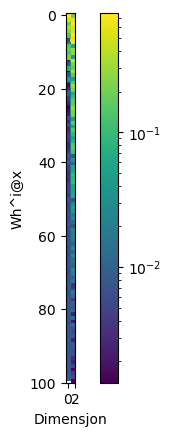

In [28]:
# Sjekker om Wh beholder normen til x 
x = np.random.uniform(size=hidden_size)
# x_const = np.ones((100,100))
x_const = np.random.uniform(size=(100,hidden_size))
print("Norm av input:", np.linalg.norm(x))
print("Norm av Wh-skalert input",np.linalg.norm(Wh @ x), "ratio:", np.linalg.norm(Wh @ x)/np.linalg.norm(x))
# Finner utviklingen av normen av Wh-skalert input
for i in range(1,100):
    Wx = model1.input.weight.detach().numpy()
    Wx_norm = np.linalg.norm(Wx)
    x_const[i] = np.linalg.matrix_power(Wh,i) @ x_const[i]
    # x_const[i] = np.linalg.matrix_power(Wh,i) @ Wx.squeeze()*x[i]
    # x_const[i] = Wx_norm**i* Wh**i @ x_const[i]
plt.imshow(x_const)
pcm = plt.pcolor(x_const, norm = "log")
plt.colorbar(pcm)
# plt.colorbar()
plt.xlabel("Dimensjon")
plt.ylabel("Wh^i@x")
plt.show()

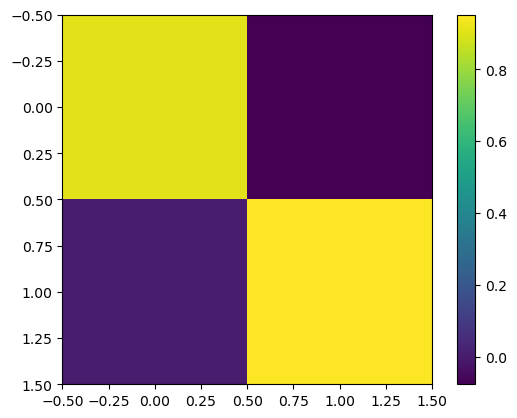

In [29]:
plt.imshow(Wh)
plt.colorbar()

In [30]:
Wx = model1.input.weight.detach().numpy()
print("Norm of Wx: ",np.linalg.norm(Wx))

Norm of Wx:  0.8849483


In [31]:
import numpy as np
from sklearn.decomposition import PCA

# PCA of the weight matrix Wh
print(model1.hts.squeeze().T.detach().numpy())

pca = PCA(n_components=4)
pca.fit(model1.hts.T.squeeze().detach().numpy())
print("PCA variance ratio: ",pca.explained_variance_ratio_) # Variance explained by each component, the bigger the more a dimension is important
print("PCA singular values: ",pca.singular_values_)
# print("PCA components: ",pca.components_)
# print("PCA mean: ",pca.mean_)
print("PCA noise: ", pca.noise_variance_)

[[ 0.4538218   0.9421892   0.7970054   0.55996275  0.30600992 -0.02359048
  -0.33511725 -0.54694796 -0.7011516  -0.8215621  -0.8566407  -0.80071557
  -0.70609677 -0.55216056 -0.32612193 -0.07215592  0.24862939  0.4950661
   0.6990501   0.835999    0.98144287]
 [ 0.89110434  0.3120736   0.5866435   0.8100078   0.9576628   1.0002792
   0.94225216  0.82827336  0.68716276  0.5500357   0.48947048  0.5559695
   0.6974961   0.84028023  0.9462129   0.98416626  0.94591874  0.83102477
   0.66845787  0.46180266  0.2192724 ]]


ValueError: n_components=4 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'